### we have the placement data of jain university bangalore's MBA batch of 215 students

## questions to be answered through exploratory data analysis
1. Does Gender effect Placements?
2. Does Work experience give you a better shot at getting placed?
3. Does your education till highschool/degree effect your chances?
4. Does your MBA specialisation and percentage effect your chances of getting      placed
5. Does the placement test conducted by institute play a role in placements 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataframe 

In [7]:
df = pd.read_csv("Placement_Data_Full_Class.csv")

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [9]:
df.describe

<bound method NDFrame.describe of      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Te

In [10]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


CHECK NULL VALUES

In [13]:
df_rows = df.shape[0]
num_missing = df_rows - df.count()
num_missing

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

missing values are only in the salary column (candidate not placed). let us fill these with 0 for easy data analysis.

In [14]:
df['salary'].fillna(0,inplace = True)

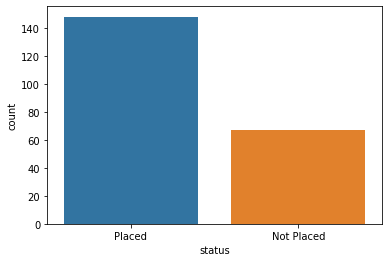

In [16]:
sns.countplot(df['status'])

Let us see the relationship between each attribute and the placement status, and salary.


In [17]:
len(df[df['status']=='Placed'])/len(df)

0.6883720930232559

68% of participants were placed

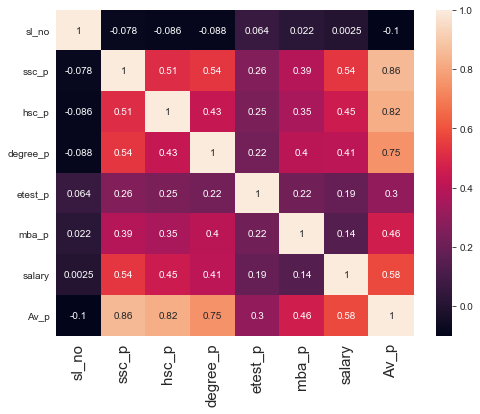

In [308]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

### We see that salary is most highly correlated to the marks obtained in under graduation and school level

# 1. GENDER AND PLACEMENT

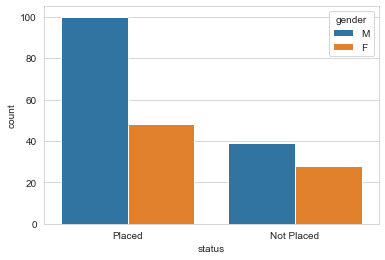

In [18]:
sns.set_style("whitegrid")
sns.countplot(df['status'], hue = df['gender'])

In [19]:
len(df[(df['status']=='Placed') & (df['gender']=='M')])/len(df[df['gender']=='M'])

0.7194244604316546

Therefore 71% of men were placed

In [20]:
len(df[(df['status']=='Placed') & (df['gender']=='F')])/len(df[df['gender']=='F'])

0.631578947368421

And 63% of women were placed

### Let us see the median salaries and outliers for men and women with a boxplot

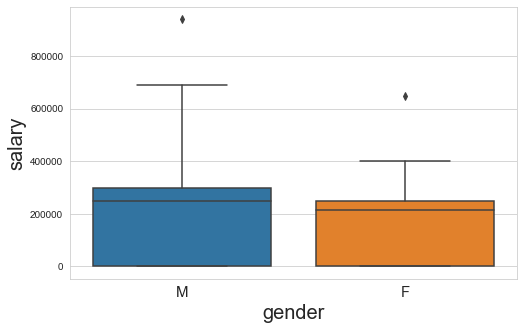

In [237]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=df['salary'], x = df['gender'])

Text(0.5, 1.0, 'AVERAGE SALARY FOR GENDER')

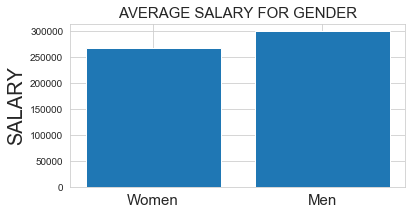

In [218]:
fig,ax = plt.subplots(figsize = (6,3))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=10) 
plt.rc('axes', labelsize=20, titlesize = 15) 
ax.bar([1,2],[df[(df["gender"]=="F") & (df['salary']!=0.0)]['salary'].mean(),df[(df["gender"]=="M") & (df['salary']!=0.0)]['salary'].mean()], 0.8)
ax.set_xticks([1,2])
ax.set_xticklabels(("Women","Men"))
ax.set_ylabel("SALARY")
ax.set_title("AVERAGE SALARY FOR GENDER")

Distribution of Mens and Womens salaries

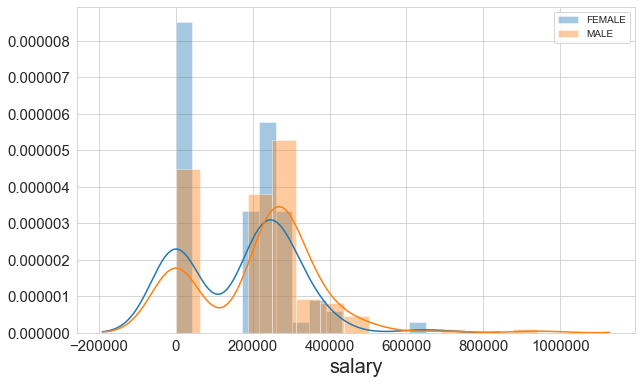

In [166]:
plt.figure(figsize = (10,6))
sns.distplot(df[df['gender']=='F']['salary'], bins = 15,label = "FEMALE")
sns.distplot(df[df['gender']=='M']['salary'], bins = 15,label = "MALE")
plt.legend()
plt.show()

## INFERENCES FROM GENDER

1. The proportion of males is more in our data.
2. The proportion of males who were placed is more than the proportion of females who were placed.
3. Males on average earned better salaries
4. The Max salary was more for men, and their are more outliers.

Therefore, men overall are in a better position to get placed

# 2. WORK EXPERIENCE

In [33]:
len(df[df['workex']=='Yes'])

74

In [34]:
len(df[df['workex']=='No'])

141

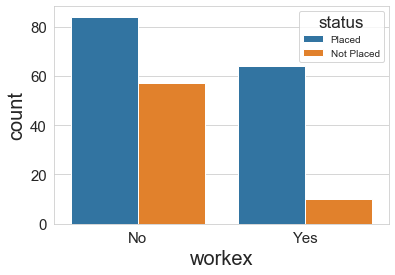

In [152]:
sns.countplot(df['workex'], hue = df['status'])


In [36]:

len(df[(df['status']=='Placed') & (df['workex']=='Yes')])/len(df[df['workex']=='Yes'])

0.8648648648648649

86% of people with work experience got placed

In [37]:
len(df[(df['status']=='Placed') & (df['workex']=='No')])/len(df[df['workex']=='No'])

0.5957446808510638

only 60% of people without work experience got placed

Average salaries of people with workex

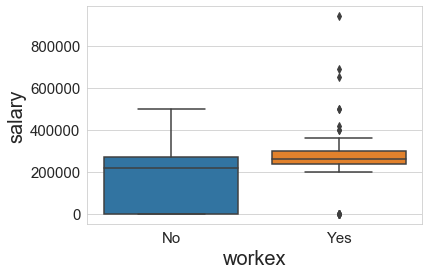

In [165]:
sns.boxplot(y=df['salary'], x = df['workex'])

Text(0.5, 1.0, 'AVERAGE SALARY PER WORKEX')

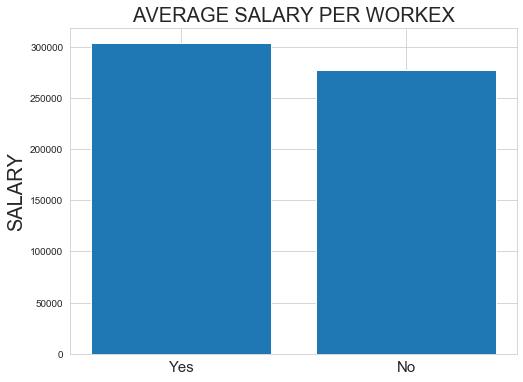

In [106]:
fig,ax = plt.subplots(figsize = (8,6))

ax.bar([1,2],[df[(df["workex"]=="Yes") & (df['salary']!=0.0)]['salary'].mean(),df[(df["workex"]=="No") & (df['salary']!=0.0)]['salary'].mean()], 0.8)
ax.set_xticks([1,2])
ax.set_xticklabels(("Yes","No"))
ax.set_ylabel("SALARY")
ax.set_title("AVERAGE SALARY PER WORKEX")

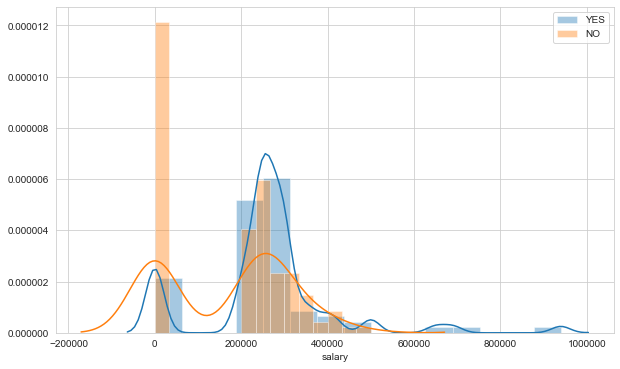

In [44]:
plt.figure(figsize = (10,6))
sns.distplot(df[df['workex']=='Yes']['salary'], bins = 15,label = "YES")
sns.distplot(df[df['workex']=='No']['salary'], bins = 15,label = "NO")
plt.legend()
plt.show()

## inferences from work experience

 1. A much higher ratio of succesful placement is observed for those with work experience
 2. People with work experience also earn higher salaries, as seen from the boxplot where people with work experience have more outliers.
 3. A large number of people without work experience have gone unplaced
 
 Therefore, people with work experience are in a much better position to get placed

# 3. Previous Education

Since there are a large number of attributes, let us add a column to our dataframe, taking average of all percentages

In [231]:
df2 = df


In [46]:
df2['Av_p'] = (df2['ssc_p']+df2['hsc_p']+df2['degree_p'])/3

#### 1. Does the average percentage in lower studies correlate with mba percentage?

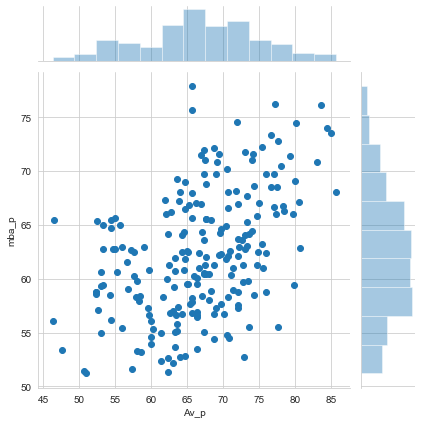

In [47]:
sns.jointplot('Av_p','mba_p', data = df)

We see that mba percentage is correlated positively to Average percentage in lower education

#### 2. Let us see distribution of students

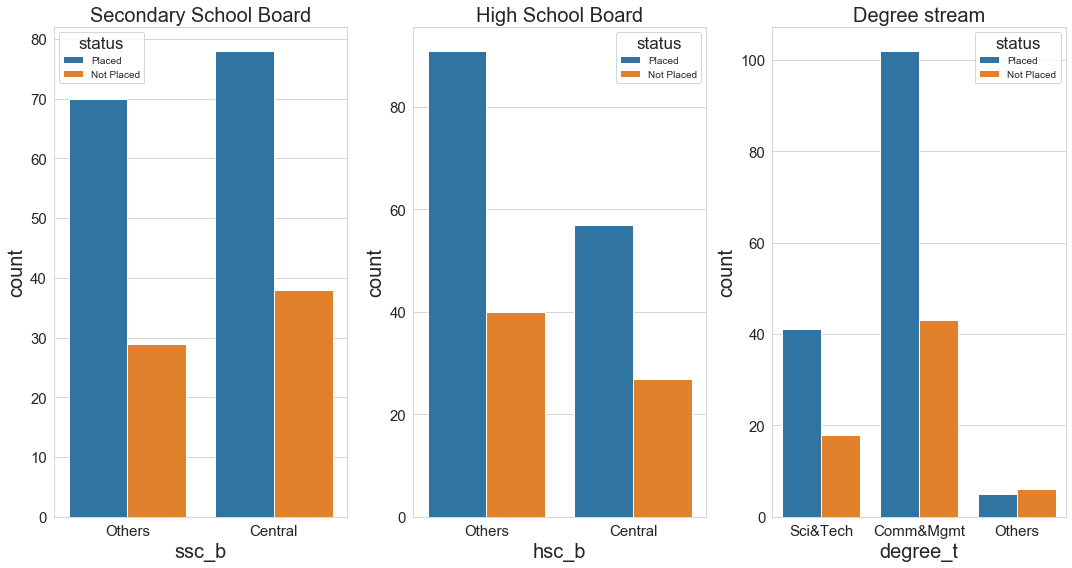

In [109]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize = (15,8))
sns.countplot(df2['ssc_b'], hue = df2['status'],ax = axes[0])
sns.countplot(df2['hsc_b'], hue = df2['status'],ax = axes[1])
sns.countplot(df2['degree_t'], hue = df2['status'],ax = axes[2])
axes[0].set_title("Secondary School Board")
axes[1].set_title("High School Board")
axes[2].set_title("Degree stream")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('axes', labelsize=20, titlesize = 20) 

plt.tight_layout()
 

### 3. Does the lower studies scores of the candidate affect placement?

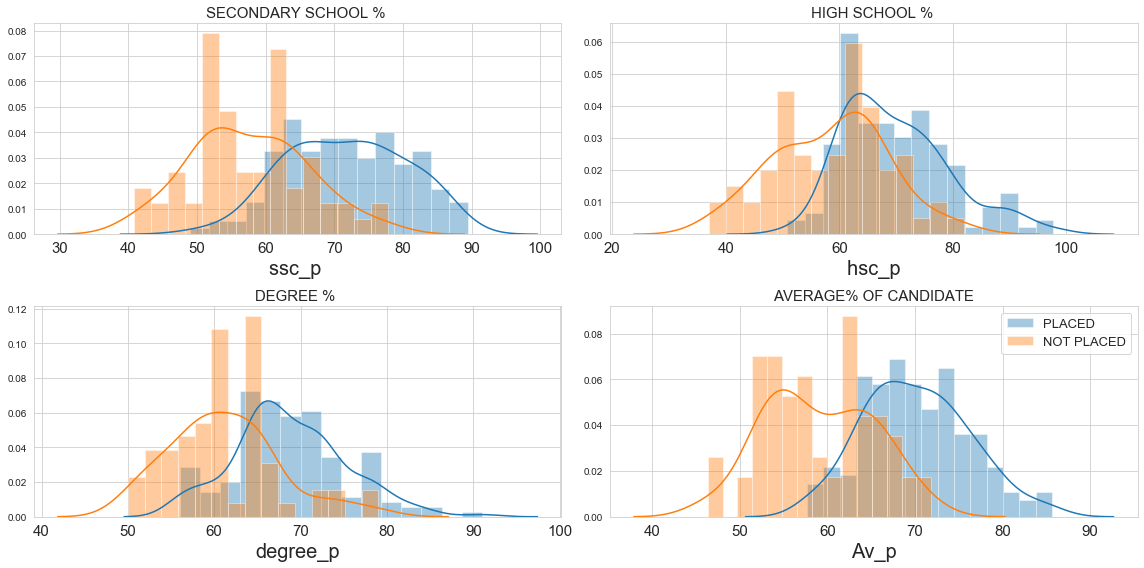

In [251]:
fig, ax = plt.subplots(nrows= 2, ncols=2, figsize=(16,8))


sns.distplot(df[df['status']=='Placed']['ssc_p'], bins = 15,label = "PLACED", ax= ax[0,0])
sns.distplot(df[df['status']=='Not Placed']['ssc_p'], bins = 15,label = "NOT PLACED", ax = ax[0,0])

sns.distplot(df[df['status']=='Placed']['hsc_p'], bins = 15,label = "PLACED", ax= ax[0,1])
sns.distplot(df[df['status']=='Not Placed']['hsc_p'], bins = 15,label = "NOT PLACED",ax= ax[0,1])

sns.distplot(df[df['status']=='Placed']['degree_p'], bins = 15,label = "PLACED", ax= ax[1,0])
sns.distplot(df[df['status']=='Not Placed']['degree_p'], bins = 15,label = "NOT PLACED",ax= ax[1,0])

sns.distplot(df2[df2['status']=='Placed']['Av_p'], bins = 15,label = "PLACED", ax= ax[1,1])
sns.distplot(df2[df2['status']=='Not Placed']['Av_p'], bins = 15,label = "NOT PLACED",ax= ax[1,1])
plt.legend(prop={'size': 13})
ax[0,0].set_title("SECONDARY SCHOOL % ")
ax[0,0].set_xlabel("  ssc_p   ")

ax[0,1].set_title("HIGH SCHOOL % ")
ax[0,1].set_xlabel("  hsc_p  ")

ax[1,0].set_title("DEGREE % ")
ax[1,0].set_xlabel("degree_p")

ax[1,1].set_title('AVERAGE% OF CANDIDATE')
plt.tight_layout()

plt.show()

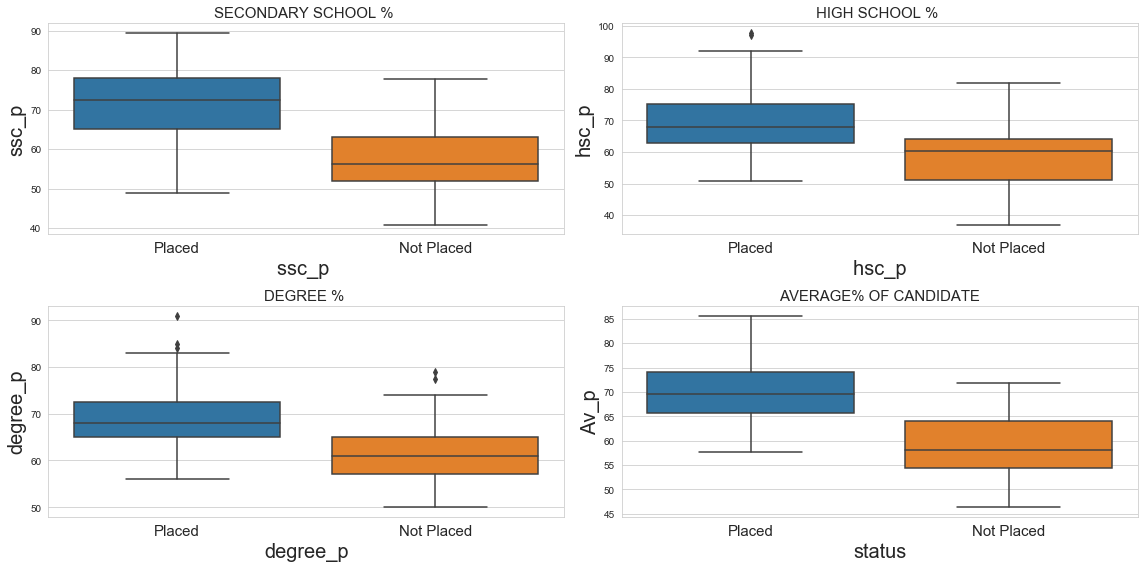

In [264]:
fig, ax = plt.subplots(nrows= 2, ncols=2, figsize=(16,8))


sns.boxplot(x= df['status'], y= df['ssc_p'], ax= ax[0,0])


sns.boxplot(x= df['status'], y= df['hsc_p'], ax= ax[0,1])

sns.boxplot(x= df['status'], y= df['degree_p'], ax= ax[1,0])

sns.boxplot(x= df['status'], y= df['Av_p'], ax= ax[1,1])

ax[0,0].set_title("SECONDARY SCHOOL % ")
ax[0,0].set_xlabel("  ssc_p   ")

ax[0,1].set_title("HIGH SCHOOL % ")
ax[0,1].set_xlabel("  hsc_p  ")

ax[1,0].set_title("DEGREE % ")
ax[1,0].set_xlabel("degree_p")

ax[1,1].set_title('AVERAGE% OF CANDIDATE')
plt.tight_layout()

plt.show()

## Inferences

1. In secondary school and highschool, more students opted for central boared, but in high school more students chose other boards

2. Inspite of this, the proportion of students getting placed from either boards remains similar and no drastic change is observed

3. We see that drastically higher number of students have opted for commerce and management field in their undergraduate

4. the proportion of students getting placed also remains similar for students from tech and management backgrounds

5. for students from other UG backrounds, a large variation is seen. A higher number of students go unplaced. However, sample size is very small (11 out of 215)

6. Students scoring better in lower studies have a better chance of getting placed from the histograms

CONCLUSION:
1. The boards opted by the students plays little role.
2. The degree field, if not tech or commerce, reduces chance of getting placed.
3. Students who scored higher from youth are at a better postion to get placed.


# 4.  MBA specialisation and score vs. Placements


### 1. Is MBA percentage related to the previous scores of the candidate?

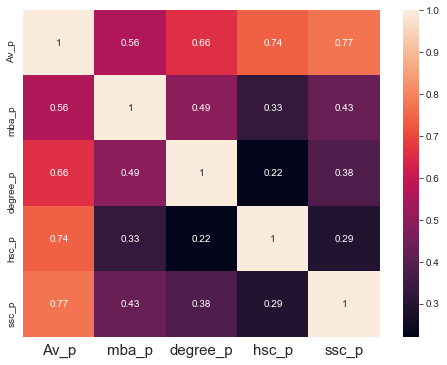

In [222]:
fig, ax = plt.subplots(figsize = (8,6))
df3 = df2[['Av_p','mba_p','degree_p','hsc_p','ssc_p']]
corr = df3.corr()

sns.heatmap(corr,annot = True)

From the above heatmap, we can see that mba score is most highly correlated to the degree percentage and the average percentages.

### 2. How does the placement status depend on the MBA specialization?

In [280]:
pd.DataFrame(df.groupby(['specialisation','status'])['sl_no'].count()).rename(columns={'sl_no': 'no. of students'})

no. of students
specialisation status                     
Mkt&Fin        Not Placed               25
               Placed                   95
Mkt&HR         Not Placed               42
               Placed                   53

Text(0, 0.5, 'Number of students')

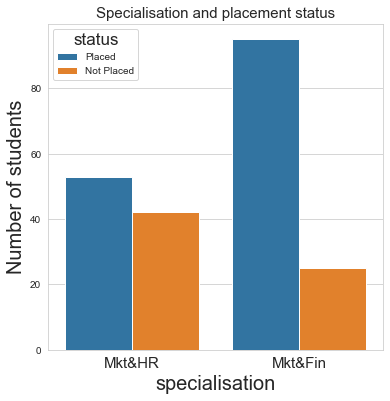

In [279]:
fig, axes = plt.subplots(figsize = (6,6))
sns.countplot(df['specialisation'], hue = df['status'])
axes.set_title("Specialisation and placement status")
axes.set_ylabel("Number of students")

It becomes clear that specialisation in marketing and finance is advantageous for placements.

### 3. How does mba score effect placement status?

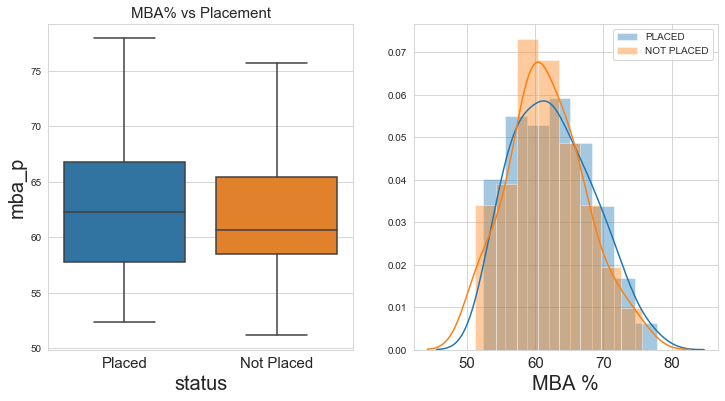

In [281]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize = (12,6))
sns.distplot(df[df['status']=='Placed']['mba_p'], label = "PLACED",ax = axes[1])
sns.distplot(df[df['status']=='Not Placed']['mba_p'], label = "NOT PLACED",ax = axes[1])
axes[0].set_title("MBA% vs Placement")
axes[1].set_xlabel("MBA %")
axes[0].set_ylabel("MBA %")
sns.boxplot(x= df['status'],y= df['mba_p'],ax = axes[0])
plt.legend()

## Inferences

1. MBA % is weakly correlated to previous scores
2. Finance students have a much better chance of getting placed than HR students
3. The MBA percentages do not seem to play as big a role as played by the scores obtained by the student for previous certificate. This may be because the previous scores are indicative of the skill level and talent of the student, as companies coming for placements look beyond just percentages.

### Conclusion:
1. Finance is preferred to HR
2. MBA percentage does not play a huge role.

# 5. Placement Test

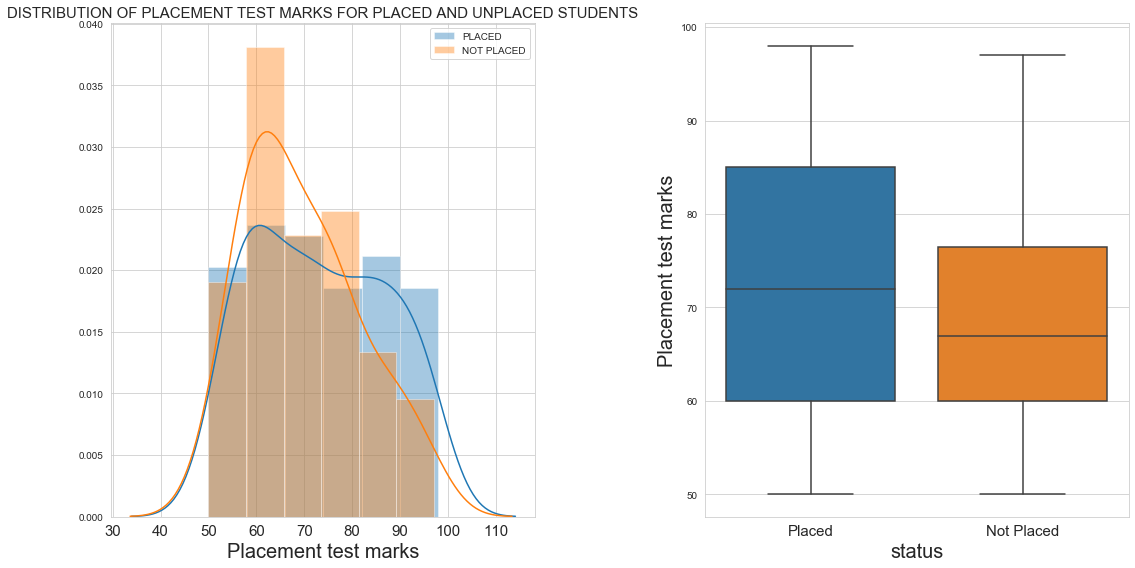

In [297]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))

sns.distplot(df[df['status']=='Placed']['etest_p'], label = 'PLACED', ax = ax[0])
sns.distplot(df[df['status']=='Not Placed']['etest_p'], label = 'NOT PLACED', ax = ax[0])
sns.boxplot(x = df['status'],y = df['etest_p'], ax = ax[1])
ax[0].set_title("DISTRIBUTION OF PLACEMENT TEST MARKS FOR PLACED AND UNPLACED STUDENTS")
ax[0].set_xlabel("Placement test marks")
ax[1].set_ylabel("Placement test marks")
plt.tight_layout()
ax[0].legend()

In [301]:
df['etest_p'].corr(df['mba_p'])

0.21805467070624499

## Inferences
1. People who are placed have a higher median score than people who were not placed
2. People who were placed had higher scores on average than people who were not placed

### Conclusion
People with higher scores have a better chance.